<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/02_02_maze_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maze solver

In [18]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
import algorithmic_complexity.mazebuilder as mb
import matplotlib.pyplot as plt

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [19]:
def drawMaze(maze, size=15):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(maze)
  ax.axis("off")

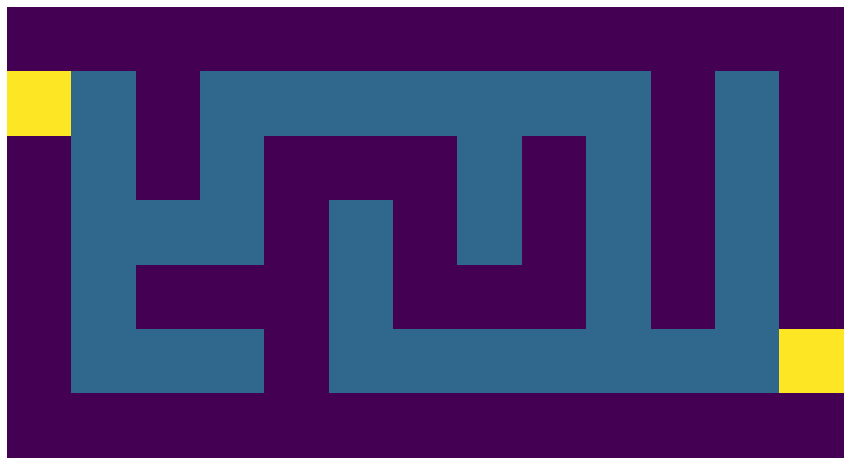

In [20]:
maze = mb.makeMaze(3, 6)
drawMaze(maze)

In [21]:
maze

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
type(maze)

numpy.ndarray

In [40]:
def mazeSolver(maze, row, col, rowF, colF):
  maze[row, col] = 3  # camino correcto (amarillo)
  if row == rowF and col == colF:
    drawMaze(maze)
    return True

  nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
  for nextR, nextC in nextSteps:
    if maze[nextR, nextC] == 1 and mazeSolver(maze, nextR, nextC, rowF, colF):
      return True

  maze[row, col] = 2  # por aquí no era (verde)
  return False

True

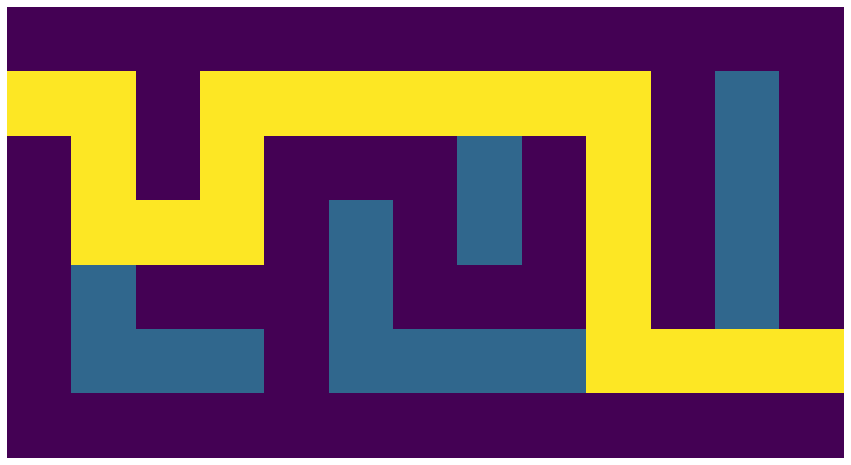

In [24]:
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

True

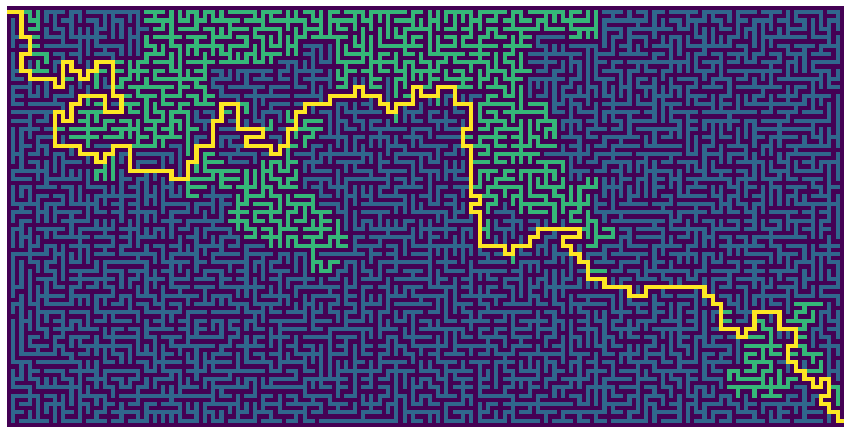

In [25]:
maze = mb.makeMaze(50, 100)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

## Ojo con la recursividad

In [26]:
maze = mb.makeMaze(100, 200)
print(maze.shape)
rows, cols = maze.shape
mazeSolver(maze, 1, 1, rows - 2, cols - 2)

(201, 401)


RecursionError: ignored

In [35]:
import pdb

def mazeSolver2(maze, rowI, colI, rowF, colF):
  stack = [(rowI, colI)]

  while stack:
    #pdb.set_trace()
    row, col = stack[-1]
    if row == rowF and col == colF:
      maze[row, col] = 3  # camino correcto (amarillo)
      drawMaze(maze)
      return
    elif maze[row, col] == 1:
      maze[row, col] = 3  # camino correcto (amarillo)
      nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
      for nextR, nextC in nextSteps:
        if maze[nextR, nextC] == 1:
          stack.append((nextR, nextC))
    elif maze[row, col] == 3:
      maze[row, col] = 2
      stack.pop()

In [28]:
import numpy as np
base = mb.makeMaze(100, 200)

(201, 401)


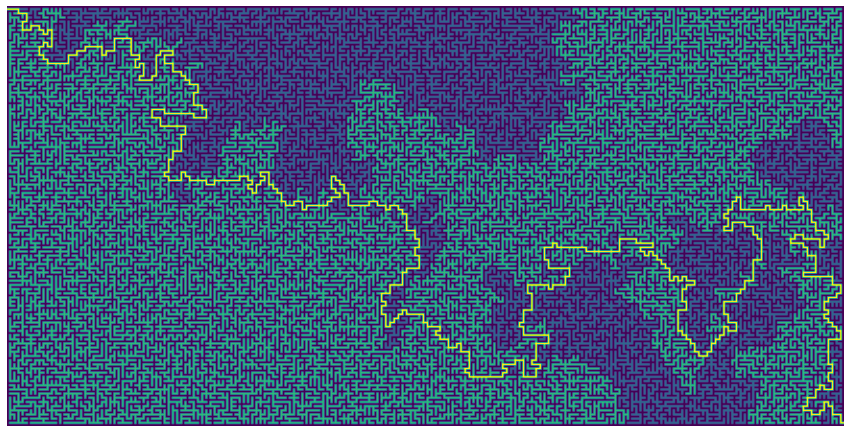

In [29]:
maze = np.copy(base)
print(maze.shape)
rows, cols = maze.shape
mazeSolver2(maze, 1, 1, rows - 2, cols - 2)

In [36]:
def mazeSolver3(maze, row, col, rowF, colF):
  while True:
    b = False
    nextSteps = [(row, col+1), (row+1, col), (row, col-1), (row-1, col)]
    for nextR, nextC in nextSteps:
      if maze[nextR, nextC] == 1:
        maze[row, col] = 3
        row = nextR
        col = nextC
        b = True
        break
    if row == rowF and col == colF:
      maze[row, col] = 3
      drawMaze(maze)
      return
    if not b:
      for nextR, nextC in nextSteps:
        if maze[nextR, nextC] == 3:
          maze[row, col] = 2
          row = nextR
          col = nextC
          break

(201, 401)


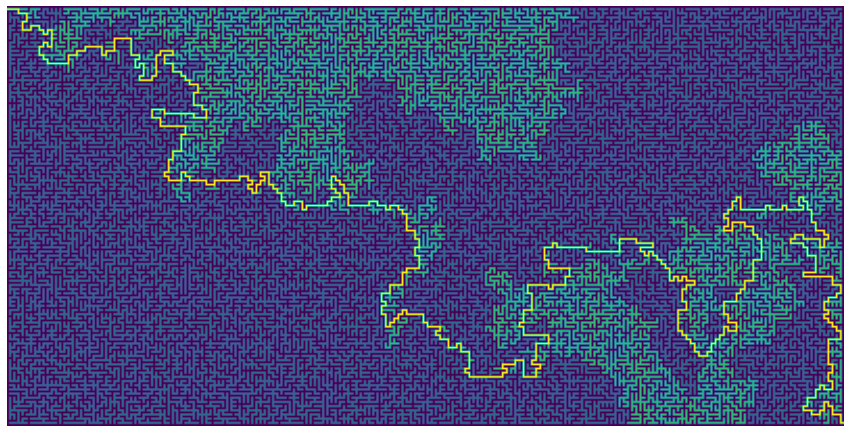

In [32]:
maze = np.copy(base)
print(maze.shape)
rows, cols = maze.shape
mazeSolver3(maze, 1, 1, rows - 2, cols - 2)

In [44]:
base = mb.makeMaze(50, 100)

In [48]:
def test1():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test1()

100 loops, best of 5: 9 ms per loop


In [49]:
def test2():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver2(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test2()

10 loops, best of 5: 30.1 ms per loop


In [51]:
def test3():
  maze = np.copy(base)
  rows, cols = maze.shape
  mazeSolver3(maze, 1, 1, rows - 2, cols - 2)
  return
%timeit test3()

100 loops, best of 5: 16 ms per loop
